In [1]:
import numpy as np
from dgamod import *
import cmath as cm
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import os
mpl.rcParams.update({'font.size': 12})
plt.rcParams['axes.axisbelow'] = True
%matplotlib widget
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linewidth'] = 2
#mpl.rcParams['axes.prop_cycle'] = cycler(color='bgrkmyc')

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["b", "g", "r", 'k','y' , 'm','tab:orange', 'tab:cyan', 'tab:brown', 'slategrey', 'deeppink' ]) 

In [2]:
path = '/home/sofi/Documentos/resultados_dynga/'

In [3]:
def compare_mean(dataframes, title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean ' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()

        plt.errorbar(stats['dimension'],stats['mean'], yerr=stats['std'],fmt='o-',label = label,capsize=4, zorder=-2)
    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + 'mean' +attribute + '.png')
    return True

def compare_maxmin(dataframes, maxmin = 'max',title = False, attribute = 'fitness', labels = False, figsize = [12,5], save = False):
    
    axs = plt.figure(figsize=figsize)

    if not title:
        title = 'Mean' + attribute
    
    for i in range(len(dataframes)):
        dataframe = dataframes[i]
        
        if labels:
            label = labels[i]

        grouped_df = dataframe.groupby('dimension')
        mean = grouped_df[attribute].mean()
        std = grouped_df[attribute].std()
        min_value = grouped_df[attribute].min()
        max_value = grouped_df[attribute].max()

        stats = pd.DataFrame({'mean': mean, 'std': std, 'min': min_value,
                            'max': max_value})

        stats = stats.reset_index()
        if maxmin == 'max':
            plt.plot(stats['dimension'],stats['max'], 'o-',label = label)
        if maxmin == 'min':
            plt.plot(stats['dimension'],stats['min'], 'o-',label = label)

    plt.grid(True)
    plt.legend()
    plt.xlabel('N')
    plt.ylabel(attribute)
    plt.title(title)

    if save:
        plt.savefig(save + maxmin +attribute + '.png')

    return True

In [4]:
# -------------------------------------------------
# original version dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + '/n{}_og_v2/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    og_df = pd.concat([og_df,df])

original_version = og_df 

# -------------------------------------------------
# original version + high tolerance dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
ht_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + '/n{}_og_ht/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    ht_df = pd.concat([ht_df,df])

original_version_ht = ht_df 


# -------------------------------------------------
# new actions dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
na1_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'n{}_na/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    na1_df = pd.concat([na1_df,df])

new_actions = na1_df 


# -------------------------------------------------
# new actions + high tolerance dataframe
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
na_ht_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'n{}_na_ht/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    na_ht_df = pd.concat([na_ht_df,df])
na_ht_df['time'] = na_ht_df['time']
new_actions_ht = na_ht_df 

# -------------------------------------------------
# original + fitness no acumulativa
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_wd_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'n{}_og_nac/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    og_wd_df = pd.concat([og_wd_df,df])
og_wd_df['time'] = og_wd_df['time']

no_acc_original = og_wd_df 

# -------------------------------------------------
# nuevas acciones + fitness no acumulativa
# -------------------------------------------------

n_values = np.arange(6,20)

column_names = ['dimension', 'sample', 'fidelity', 'time', 'generations', 'cpu_time']
og_wd_df = pd.DataFrame(columns=column_names)

for n in n_values:
    file = path + 'n{}_na_nac/nvsmaxfid.dat'.format(n)
    df = pd.read_csv(file, delimiter = ' ', names = column_names)
    og_wd_df = pd.concat([og_wd_df,df])
og_wd_df['time'] = og_wd_df['time']

no_acc_new_actions = og_wd_df 


/tmp/ipykernel_14270/3527631390.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  og_df = pd.concat([og_df,df])
/tmp/ipykernel_14270/3527631390.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ht_df = pd.concat([ht_df,df])
/tmp/ipykernel_14270/3527631390.py:46: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behav

True

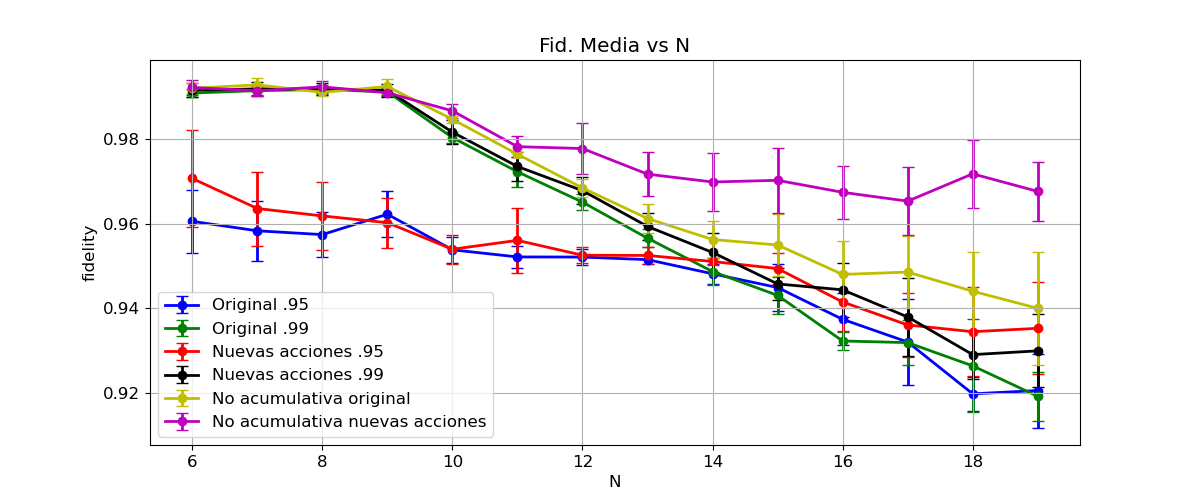

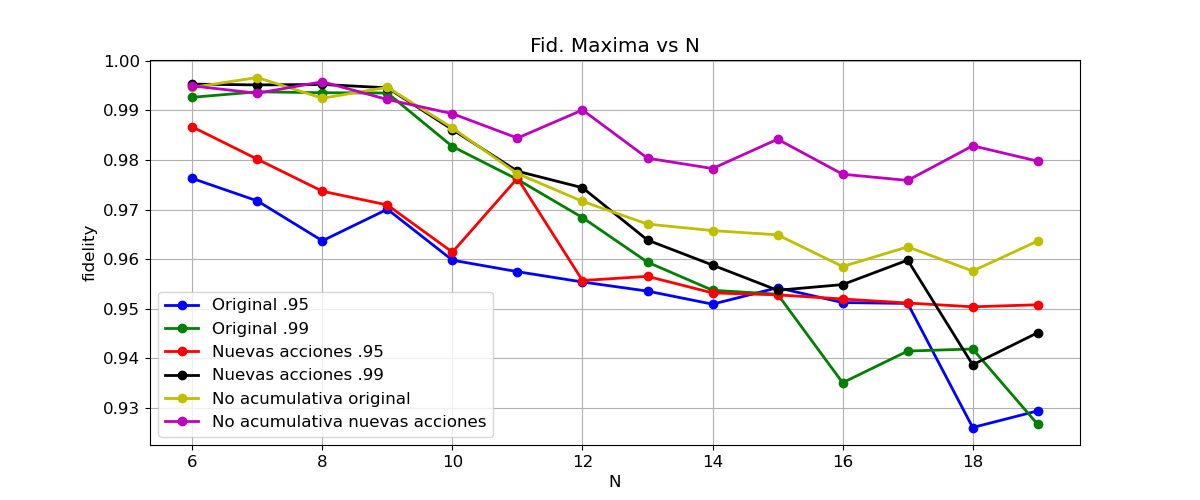

In [5]:

compare_mean([original_version,original_version_ht, new_actions,new_actions_ht,no_acc_original,no_acc_new_actions],title= 'Fid. Media vs N', attribute= 'fidelity',labels=['Original .95','Original .99', 'Nuevas acciones .95',  'Nuevas acciones .99', 'No acumulativa original', 'No acumulativa nuevas acciones'])
compare_maxmin([original_version,original_version_ht, new_actions,new_actions_ht,no_acc_original,no_acc_new_actions],title= 'Fid. Maxima vs N', attribute= 'fidelity',labels=['Original .95','Original .99', 'Nuevas acciones .95',  'Nuevas acciones .99', 'No acumulativa original', 'No acumulativa nuevas acciones'])


#plt.plot(data['dimension'],3*data['dimension'])

True

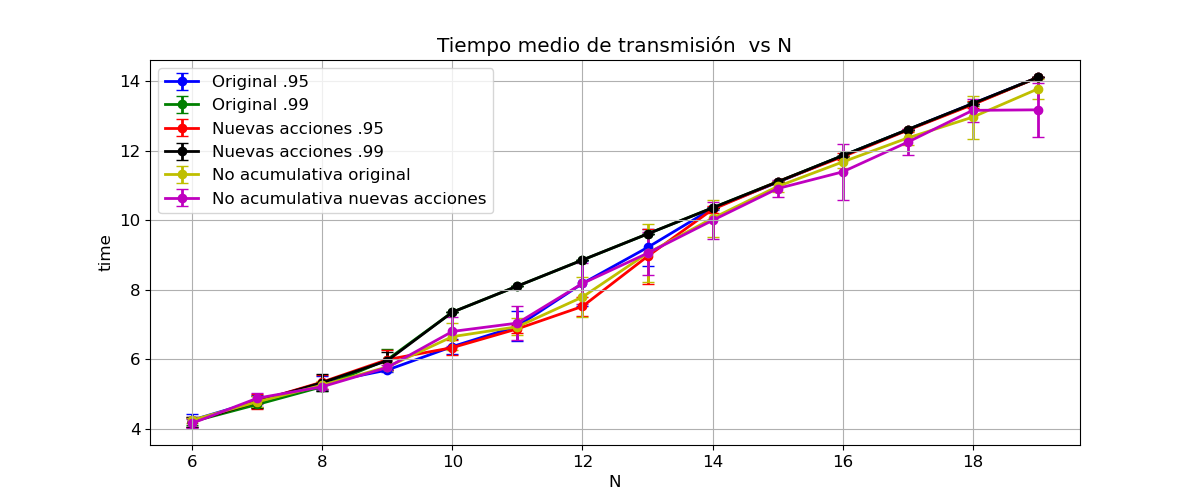

In [6]:

compare_mean([original_version,original_version_ht, new_actions,new_actions_ht,no_acc_original,no_acc_new_actions],title= 'Tiempo medio de transmisión  vs N', attribute= 'time',labels=['Original .95','Original .99', 'Nuevas acciones .95',  'Nuevas acciones .99', 'No acumulativa original', 'No acumulativa nuevas acciones'])

#plt.plot(data['dimension'],3*data['dimension'])

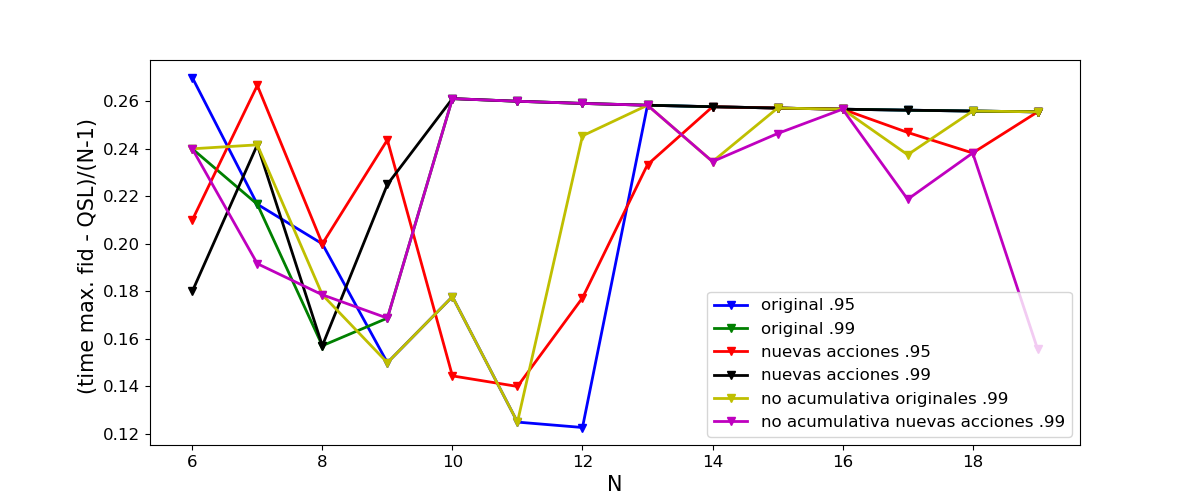

In [7]:
def get_corresponding_value(group):
    return group.loc[group['fidelity'].idxmax(), 'time']

dims = np.arange(6,20)

axs = plt.figure(figsize=[12,5])

grouped_df = original_version.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_og_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_og_time,'-v', label = 'original .95')


grouped_df = original_version_ht.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_og_ht_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_og_ht_time,'-v', label = 'original .99')


grouped_df = new_actions.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_na_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_na_time,'-v', label = 'nuevas acciones .95')


grouped_df = new_actions_ht.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_na_ht_time = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_na_ht_time,'-v', label = 'nuevas acciones .99')

grouped_df = no_acc_original.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_nacc_og = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_nacc_og,'-v', label = 'no acumulativa originales .99')


grouped_df = no_acc_new_actions.groupby('dimension')
result = grouped_df.apply(get_corresponding_value)
normalized_nacc_na = (result-dims/2)/(dims-1)
plt.plot(dims, normalized_nacc_na,'-v', label = 'no acumulativa nuevas acciones .99')

plt.ylabel('(time max. fid - QSL)/(N-1) ', fontsize = 15)
plt.xlabel('N', fontsize = 15)

plt.legend()

In [8]:
compare_mean([original_version,high_tolerance,na_ht_df,og_wd_df],title= 'Tiempo medio de transmisión  vs N', attribute= 'time',labels=['Instancia unica', 'IU + tol. alta', 'nuevas acciones ht', 'nueva fitness'])
compare_maxmin([original_version,high_tolerance,na_ht_df,og_wd_df],title= 'Tiempo de transm. media para la max fidelidad', attribute= 'time',labels=['Instancia unica', 'IU + tol. alta', 'nuevas acciones ht', 'nueva fitness'])


NameError: name 'high_tolerance' is not defined